In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
%matplotlib inline

/Users/yapkan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read csv with all data info
filename1 = 'results/resnet_20_all_5_on/predictions.csv'
filename2 = 'results/resnet_20_fc_5_on/predictions.csv'

filename3 = 'results/vgg_20_all_5_on/predictions.csv'
filename4 = 'results/vgg_20_fc_5_on/predictions.csv'
filename5 = 'results/vgg_20_last_5_on/predictions.csv'

resnet_all = pd.read_csv(filename1, usecols=['predictions'])
resnet_fc = pd.read_csv(filename2, usecols=['predictions'])

vgg_all = pd.read_csv(filename3, usecols=['predictions'])
vgg_fc = pd.read_csv(filename4, usecols=['predictions'])
vgg_last = pd.read_csv(filename5, usecols=['predictions'])

df = pd.read_csv('data/test.csv')
df = df.drop(columns=['1', '5', '10', '50', '100'])
df.head()

,artist,date,genre,style,title,filename,20
0,Marcel Broodthaers,1969,figurative,Conceptual Art,Minuit,14515.jpg,1960-1979
1,John Singer Sargent,1876,marina,Impressionism,Atlantic Storm,94528.jpg,1860-1879
2,William Merritt Chase,1882,interior,Impressionism,"The Inner Studio, Tenth Street",93146.jpg,1880-1899
3,Claude Monet,1902,landscape,Impressionism,Charing Cross Bridge 02,102612.jpg,1900-1919
4,Christopher Wood,1930,genre painting,Post-Impressionism,"Building the Boat, Tréboul",58078.jpg,1920-1939


In [3]:
df['res_all'] = resnet_all
df['res_fc'] = resnet_fc
df['vgg_all'] = vgg_all
df['vgg_fc'] = vgg_fc
df['vgg_last'] = vgg_last
df.head()

,artist,date,genre,style,title,filename,20,res_all,res_fc,vgg_all,vgg_fc,vgg_last
0,Marcel Broodthaers,1969,figurative,Conceptual Art,Minuit,14515.jpg,1960-1979,1920-1939,1980-1999,1920-1939,1900-1919,1960-1979
1,John Singer Sargent,1876,marina,Impressionism,Atlantic Storm,94528.jpg,1860-1879,1880-1899,1900-1919,1860-1879,1860-1879,1920-1939
2,William Merritt Chase,1882,interior,Impressionism,"The Inner Studio, Tenth Street",93146.jpg,1880-1899,1880-1899,1900-1919,1880-1899,1900-1919,1880-1899
3,Claude Monet,1902,landscape,Impressionism,Charing Cross Bridge 02,102612.jpg,1900-1919,1900-1919,1900-1919,1900-1919,1900-1919,1900-1919
4,Christopher Wood,1930,genre painting,Post-Impressionism,"Building the Boat, Tréboul",58078.jpg,1920-1939,1920-1939,1900-1919,1900-1919,1920-1939,1960-1979


In [4]:
df['res_all_acc'] = df['res_all'] == df['20']
df['res_fc_acc'] = df['res_fc'] == df['20']
df['vgg_all_acc'] = df['vgg_all'] == df['20']
df['vgg_fc_acc'] = df['vgg_fc'] == df['20']
df['vgg_last_acc'] = df['vgg_last'] == df['20']
df.head()

,artist,date,genre,style,title,filename,20,res_all,res_fc,vgg_all,vgg_fc,vgg_last,res_all_acc,res_fc_acc,vgg_all_acc,vgg_fc_acc,vgg_last_acc
0,Marcel Broodthaers,1969,figurative,Conceptual Art,Minuit,14515.jpg,1960-1979,1920-1939,1980-1999,1920-1939,1900-1919,1960-1979,False,False,False,False,True
1,John Singer Sargent,1876,marina,Impressionism,Atlantic Storm,94528.jpg,1860-1879,1880-1899,1900-1919,1860-1879,1860-1879,1920-1939,False,False,True,True,False
2,William Merritt Chase,1882,interior,Impressionism,"The Inner Studio, Tenth Street",93146.jpg,1880-1899,1880-1899,1900-1919,1880-1899,1900-1919,1880-1899,True,False,True,False,True
3,Claude Monet,1902,landscape,Impressionism,Charing Cross Bridge 02,102612.jpg,1900-1919,1900-1919,1900-1919,1900-1919,1900-1919,1900-1919,True,True,True,True,True
4,Christopher Wood,1930,genre painting,Post-Impressionism,"Building the Boat, Tréboul",58078.jpg,1920-1939,1920-1939,1900-1919,1900-1919,1920-1939,1960-1979,True,False,False,True,False


In [5]:
df['all_true'] = df[['res_all_acc', 'res_fc_acc', 'vgg_all_acc', 'vgg_fc_acc', 'vgg_last_acc']].all(axis=1)
print(df['all_true'].sum())
df.head()

332


,artist,date,genre,style,title,filename,20,res_all,res_fc,vgg_all,vgg_fc,vgg_last,res_all_acc,res_fc_acc,vgg_all_acc,vgg_fc_acc,vgg_last_acc,all_true
0,Marcel Broodthaers,1969,figurative,Conceptual Art,Minuit,14515.jpg,1960-1979,1920-1939,1980-1999,1920-1939,1900-1919,1960-1979,False,False,False,False,True,False
1,John Singer Sargent,1876,marina,Impressionism,Atlantic Storm,94528.jpg,1860-1879,1880-1899,1900-1919,1860-1879,1860-1879,1920-1939,False,False,True,True,False,False
2,William Merritt Chase,1882,interior,Impressionism,"The Inner Studio, Tenth Street",93146.jpg,1880-1899,1880-1899,1900-1919,1880-1899,1900-1919,1880-1899,True,False,True,False,True,False
3,Claude Monet,1902,landscape,Impressionism,Charing Cross Bridge 02,102612.jpg,1900-1919,1900-1919,1900-1919,1900-1919,1900-1919,1900-1919,True,True,True,True,True,True
4,Christopher Wood,1930,genre painting,Post-Impressionism,"Building the Boat, Tréboul",58078.jpg,1920-1939,1920-1939,1900-1919,1900-1919,1920-1939,1960-1979,True,False,False,True,False,False


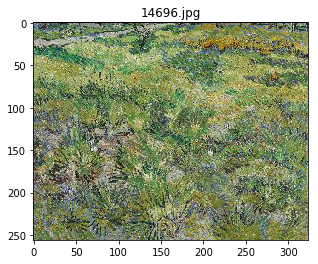

In [6]:
filename = df['filename'].iloc[291]
img = image.load_img('data/train/' + filename)
plt.title(filename)
plt.imshow(img)

In [7]:
# for index, row in df.iterrows():
#     if row['all_true'] == True:
#         filename = row['filename']
#         img = image.load_img('data/train/' + filename)
#         plt.figure()
#         plt.title(filename)
#         plt.imshow(img)

In [8]:
df_groupby = df.groupby(['style'])['all_true'].mean()
df_groupby = df_groupby.reset_index().sort_values(['all_true'],ascending=False)
df_groupby.head()

,style,all_true
93,Synchromism,1.000000
71,Perceptism,0.500000
34,Hard Edge Painting,0.487179
55,Neo-Concretism,0.400000
77,Post-Painterly Abstraction,0.368421


In [13]:
df_groupby = df.groupby(['style'])['res_all_acc','vgg_fc_acc', 'all_true'].sum()
df_groupby = df_groupby.reset_index().sort_values(['res_all_acc'],ascending=False)
df_groupby.head(20)

,style,res_all_acc,vgg_fc_acc,all_true
36,Impressionism,611.0,567.0,38.0
82,Realism,462.0,421.0,17.0
29,Expressionism,370.0,334.0,39.0
75,Post-Impressionism,290.0,267.0,18.0
10,Art Nouveau (Modern),246.0,236.0,14.0
91,Surrealism,201.0,174.0,8.0
92,Symbolism,165.0,153.0,14.0
84,Romanticism,128.0,122.0,12.0
22,Cubism,103.0,112.0,15.0
1,Abstract Expressionism,100.0,98.0,3.0
